(chapter8_part2)=


## Decision Trees in Classification

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 


This notebook is a supplement for *Chapter 8. Decision Trees* of **Machine Learning For Everyone** book.

## 1. Required Libraries, Data & Variables

Let's import the data and have a look at it:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' #to make sharper and prettier plots

# Creating the DataFrame based on the provided data
data = {
    'x1': [0.25, 0.60, 0.71, 1.20, 1.75, 2.26, 2.50, 2.50, 2.88, 2.91],
    'x2': [1.41, 0.39, 1.29, 2.30, 0.59, 1.70, 1.35, 2.90, 0.61, 2.00],
    'Color': ['blue', 'blue', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green']
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,x1,x2,Color
0,0.25,1.41,blue
1,0.60,0.39,blue
2,0.71,1.29,blue
3,1.20,2.30,blue
4,1.75,0.59,blue
5,2.26,1.70,green
6,2.50,1.35,green
7,2.50,2.90,green
8,2.88,0.61,green
9,2.91,2.00,green


## 2. Visualizing Dataframe

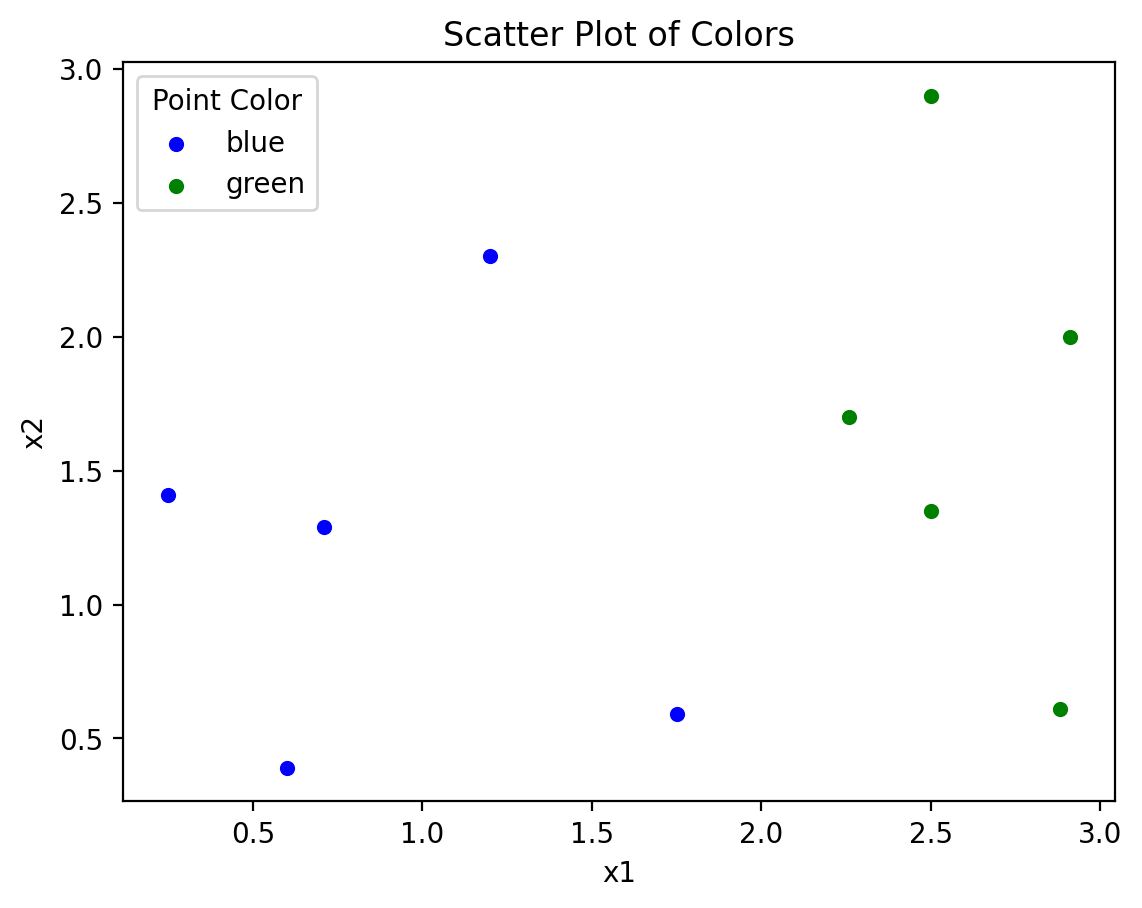

In [2]:
# Plotting
fig, ax = plt.subplots()
colors = {'blue': 'blue', 'green': 'green'}

# Group by color and then plot each group
for key, group in df.groupby('Color'):
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])

# Setting plot labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Scatter Plot of Colors')

# Display the legend
ax.legend(title='Point Color')

# Show the plot
plt.show()

## 3. Preprocessing Dataframe

In [3]:
df['Color'] = df['Color'].map({'blue': 0, 'green': 1})

In [4]:
df

,x1,x2,Color
0,0.25,1.41,0
1,0.60,0.39,0
2,0.71,1.29,0
3,1.20,2.30,0
4,1.75,0.59,0
5,2.26,1.70,1
6,2.50,1.35,1
7,2.50,2.90,1
8,2.88,0.61,1
9,2.91,2.00,1


## 4. Training a Decision Tree with Gini

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### 4.1. Splitting into X and y

In [6]:
X = df[['x1', 'x2']]
y = df['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.2. Building the Decision Tree Classifier

In [7]:
tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 4.3. Predict and Evaluate the Model

In [8]:
y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the decision tree model:", accuracy)

Accuracy of the decision tree model: 1.0


#### 4.4. Visualize the Tree (optional)

In [9]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                                feature_names=['x1', 'x2'],  
                                class_names=['blue', 'green'],
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  

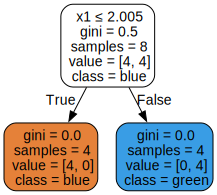

In [10]:
# Visualize the decision tree
graph

## 5. Training a Decision Tree with Entropy

#### 4.1. Splitting into X and y

In [11]:
X = df[['x1', 'x2']]
y = df['Color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.2. Building the Decision Tree Classifier

In [12]:
tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### 4.3. Predict and Evaluate the Model

In [13]:
y_pred = tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the decision tree model:", accuracy)

Accuracy of the decision tree model: 1.0


#### 4.4. Visualize the Tree (optional)

In [14]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(tree_classifier, out_file=None, 
                                feature_names=['x1', 'x2'],  
                                class_names=['blue', 'green'],
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  

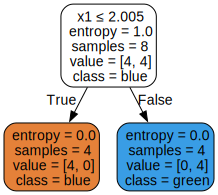

In [15]:
# Visualize the decision tree
graph